# Predict Breast Cancer

Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated from the images

##### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Examine the data

In [8]:
#reading the data
cancer = pd.read_csv('data/cancer.data', header=None, index_col=0)
cancer.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
#renaming columns
cancer.rename(columns = {1:'Clump Thickness', 2:'Uniformity of Cell Size',
                        3:'Uniformity of Cell Shape', 4:'Marginal Adhesion',
                        5:'Single Epithelial Cell Size',6:'Bare Nuclei',
                        7:'Bland Chromatin',8:'Normal Nucleoli',
                        9:'Mitoses', 10:'Class'}, inplace=True) 
cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


#### Inspecting data

In [10]:
#Dataframe information
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


From the above information we see that we have:
    - 10 columns
    - 699 entries
    - 1 object dtype and 9 int64
    
    
##### Bare Nuclei
Bare Nuclei is an object instead of integer

In [11]:
#inspect the missing value
cancer['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

The dataset has missing value it is spotted on 16 "?"

In [12]:
mode = cancer['Bare Nuclei'].value_counts().index[0]

#Replacing the '?' with common digit and converting object to integer
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].replace('?', mode).astype('int64')
cancer['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

I have replaced the missing values with the most occuring digit, in this instance which is 1. Therefore the value that was in the missing column I have added in the most occuring number. Thereafter since all the values would be numbers, I changed the column type from object to integer. 

#### Descriptive statistic

In [13]:
# descriptive summary
cancer.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


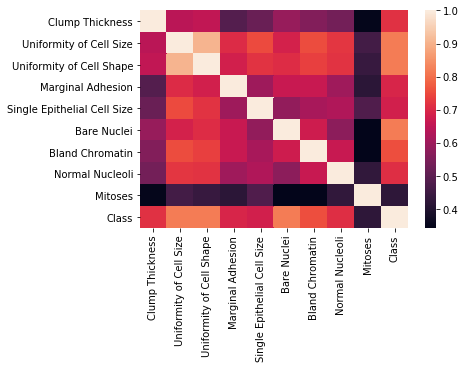

In [27]:
#correlation heatmap
sns.heatmap(cancer.corr())

In [32]:
#checking correlation
cancer.corr()['Class']

Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.818968
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

Having to look at the information it is safe to say that the variables which have a correlation of 50% or more I will only consider in testing of our model, which means that 'Mitoses' will not be used in our model.

##### Splitting data

In [31]:
# Labels
y = cancer["Mitoses"]

# Features
X = cancer.drop("Mitoses", axis=1)

##### Transforming the features

In [25]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and rescale X
scaler = MinMaxScaler(feature_range=(0, 1))
X_transformed = scaler.fit_transform(X)

In [26]:
#splitting data to training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

##### Building Logistic Model

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#Predicting
predict_model = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

labels = ['Benign', ' Malignant']

pd.DataFrame(data=confusion_matrix(y_test, predict_model), index=labels, columns=labels)

,Benign,Malignant
Benign,94,1
Malignant,2,43


The rows represent the actual output, while the columns indicate the predicted output. We see that we have classified 94+42=136 cases correctly, and 1+3=4 cases incorrectly.

###### Classification report

In [46]:
from sklearn.metrics import classification_report
print('\033[1m' + 'Classification Report')
print(classification_report(y_test, predict_model, target_names=labels))

Classification Report
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98        95
   Malignant       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

